In [142]:
# for sample in dataset:
#     sample["merged_detections"] = sample.sahi_predictions_v2_1280x1280.copy()
#     sample.merged_detections.merge(
#         sample.sahi_predictions_v3_640x640,
#         merge_lists=True, 
#         overwrite=True,    
#     )

#     sample.save()

In [143]:
# import fiftyone.utils.labels as fol


# fol.perform_nms(sample_collection=dataset, in_field="merged_detections", out_field="merged_nms", confidence_thresh=0.15, iou_thresh=0.10,classwise=True, progress=True)


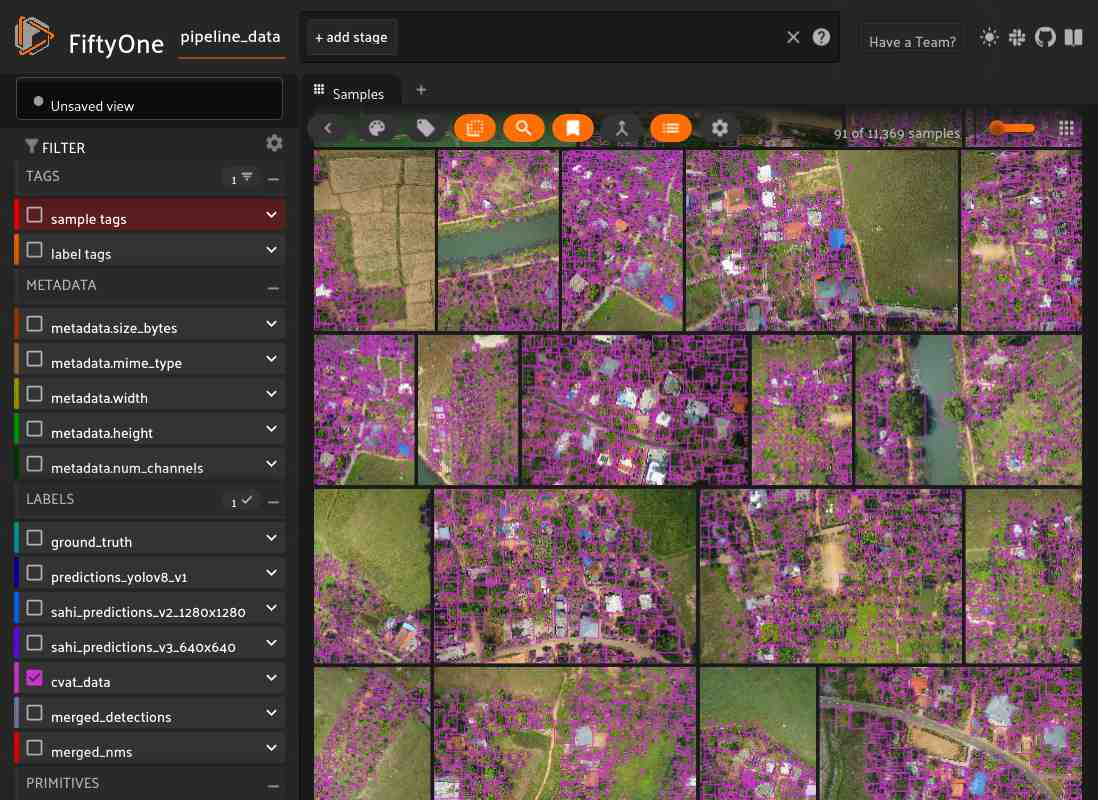

In [64]:
import fiftyone as fo
dataset = fo.load_dataset("pipeline_data")
session = fo.launch_app(dataset)


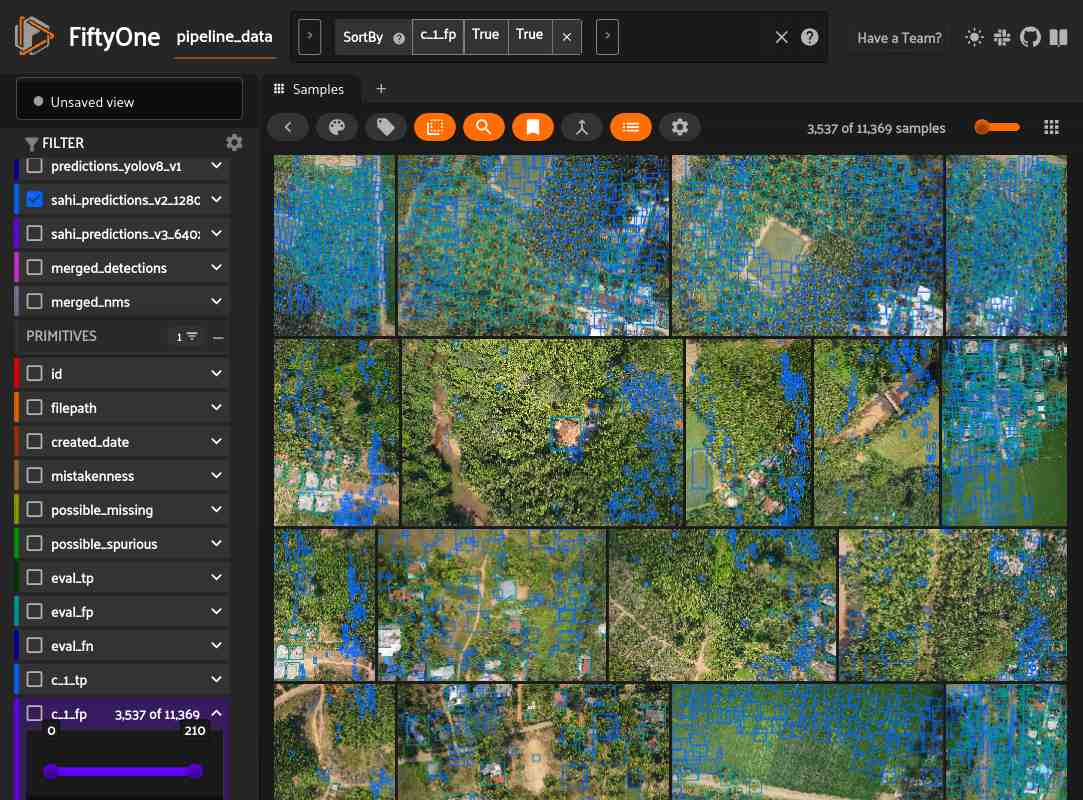

In [170]:
# Show samples with most false positives
session.view = dataset.sort_by("c_1_fp", reverse=True)

In [66]:
view = dataset.match_tags("export")
session.view = view


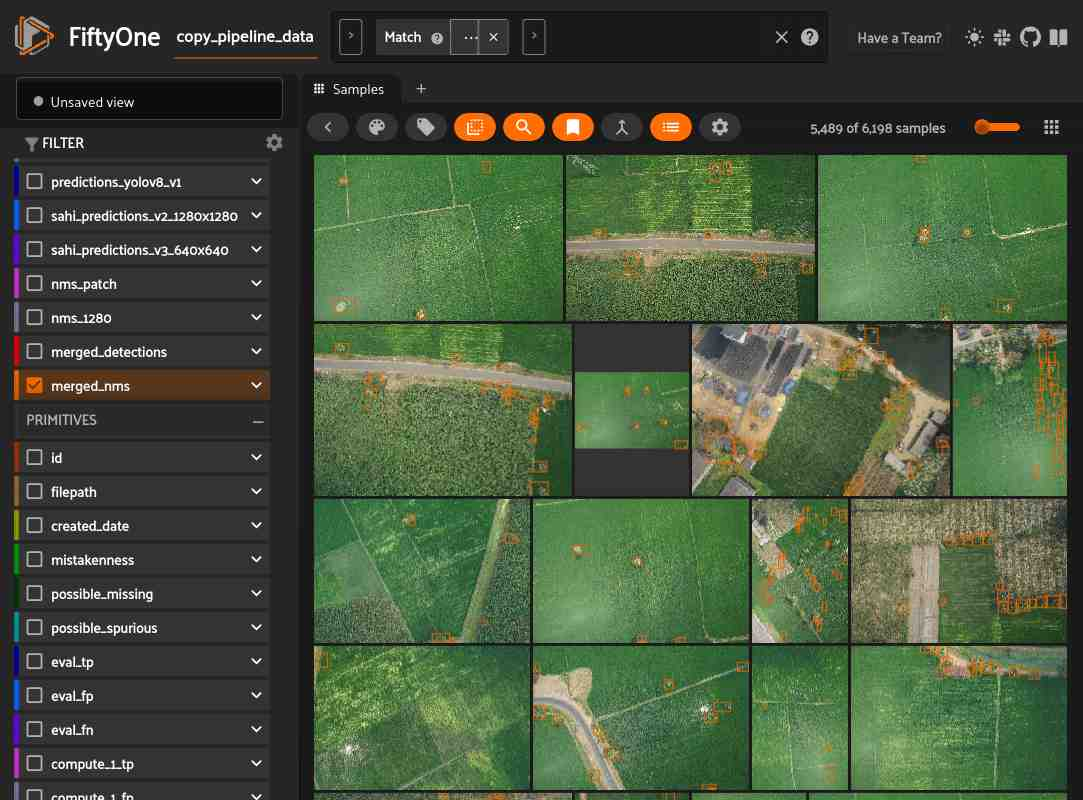

In [42]:
import fiftyone as fo
from datetime import datetime

from fiftyone import ViewField as F
dataset = fo.load_dataset("copy_pipeline_data")
query_date = datetime(2023, 9, 22, 0, 0, 0)
view = dataset.match(F("created_date") < query_date)
# session = fo.launch_app(dataset)
session.view = view

In [67]:


export_dir = "cvat_annotated_data"
label_field = "cvat_data"  # for example

# label_field = "sahi_predictions_v2_1280x1280"  # for example
samples = view
# # The splits to export
# splits = ["train", "", "val"]

# All splits must use the same classes list
classes = ["ELECTRIC_POLES", "TREES", "TEMPORARY_STRUCTURES", "PERMENANT_STRUCTURES","SOLAR", "PYLON", "WELL", "TLP"]

# The dataset or view to export
# We assume the dataset uses sample tags to encode the splits to export
# dataset_or_view = fo.Dataset(...)

# Export the splits

    # split_view = dataset_or_view.match_tags(split)
samples.export(
    export_dir=export_dir,
    dataset_type=fo.types.COCODetectionDataset,
    label_field=label_field,
)

 100% |███████████████████| 91/91 [3.8s elapsed, 0s remaining, 34.4 samples/s]      


In [40]:
samples

Dataset:     copy_pipeline_data
Media type:  image
Num samples: 500
Sample fields:
    id:                            fiftyone.core.fields.ObjectIdField
    filepath:                      fiftyone.core.fields.StringField
    tags:                          fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:                  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    created_date:                  fiftyone.core.fields.DateField
    predictions_yolov8_v1:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    mistakenness:                  fiftyone.core.fields.FloatField
    possible_missing:              fiftyone.core.fields.IntField
    possible_spurious:             fiftyone.core.fields.IntField
    eval_tp:                       fiftyone.core.fields.IntField
    eval_fp: 

In [15]:
from ultralytics import YOLO

In [6]:
model = YOLO()

100%|██████████| 6.23M/6.23M [00:24<00:00, 271kB/s]


In [ ]:
import os
import random
import shutil

def split_data(image_folder, label_folder, output_folder, train_ratio=0.7, test_ratio=0.15, val_ratio=0.15):
    assert train_ratio + test_ratio + val_ratio == 1.0, "Ratios should add up to 1.0"
    
    # Create output folders
    train_folder = os.path.join(output_folder, 'train')
    test_folder = os.path.join(output_folder, 'test')
    val_folder = os.path.join(output_folder, 'val')
    
    for folder in [train_folder, test_folder, val_folder]:
        os.makedirs(os.path.join(folder, 'images'), exist_ok=True)
        os.makedirs(os.path.join(folder, 'labels'), exist_ok=True)

    # Get a list of image files
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.JPG')]
    
    # Randomly shuffle the files
    random.shuffle(image_files)

    # Calculate the number of files for each split
    num_files = len(image_files)
    num_train = int(train_ratio * num_files)
    num_test = int(test_ratio * num_files)
    num_val = num_files - num_train - num_test
    # Copy files to the corresponding folders
    for i, image_file in enumerate(image_files):
        label_file = image_file.replace('.JPG', '.txt')
        
        if i < num_train:
            shutil.copy(os.path.join(image_folder, image_file), os.path.join(train_folder, 'images', image_file))
            shutil.copy(os.path.join(label_folder, label_file), os.path.join(train_folder, 'labels', label_file))
        elif i < num_train + num_test:
            shutil.copy(os.path.join(image_folder, image_file), os.path.join(test_folder, 'images', image_file))
            shutil.copy(os.path.join(label_folder, label_file), os.path.join(test_folder, 'labels', label_file))
        else:
            shutil.copy(os.path.join(image_folder, image_file), os.path.join(val_folder, 'images', image_file))
            shutil.copy(os.path.join(label_folder, label_file), os.path.join(val_folder, 'labels', label_file))

# Specify your input and output folders
image_folder = 'practice_data/images/val'
label_folder = 'practice_data/labels/val'
output_folder = './'  # Change this to your desired output path

# Call the function to split the data

split_data(image_folder, label_folder, output_folder)


In [50]:
pip install clearml

Note: you may need to restart the kernel to use updated packages.


In [1]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=55FSGMBIBED7KJ94AUE4
%env CLEARML_API_SECRET_KEY=tx1InVXTB8JNthhepnEQM9qR25WCiN38SHYEzB3fohP5fHBKVJ

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=55FSGMBIBED7KJ94AUE4
env: CLEARML_API_SECRET_KEY=tx1InVXTB8JNthhepnEQM9qR25WCiN38SHYEzB3fohP5fHBKVJ


In [ ]:
from clearml import Task
task = Task.init(project_name="project", task_name="my_task")
results = model.train(data="/home/naveen/workspace/voxel/Pipline_workspace/datasets/dataset_1.yaml",epochs=60,batch=2,imgsz=1280,augment=True,save=True,save_period=1)

New https://pypi.org/project/ultralytics/8.2.30 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.27 🚀 Python-3.8.10 torch-2.1.0+cu121 CPU (12th Gen Intel Core(TM) i9-12900K)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/naveen/workspace/voxel/Pipline_workspace/datasets/dataset_1.yaml, epochs=60, time=None, patience=100, batch=2, imgsz=1280, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=Non

train: Scanning /home/naveen/workspace/voxel/Pipline_workspace/datasets/train/labels.cache... 700 images, 2 backgrounds, 0 corrupt: 100%|██████████| 700/700 [00:00<?, ?it/s]
val: Scanning /home/naveen/workspace/voxel/Pipline_workspace/datasets/val/labels.cache... 150 images, 1 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60         0G       2.86      4.997      2.207         37       1280: 100%|██████████| 350/350 [05:47<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:40<00:00,  1.07s/it]

                   all        150       2048      0.679     0.0225     0.0191    0.00904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60         0G      2.681      4.268      1.989         31       1280: 100%|██████████| 350/350 [05:48<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:40<00:00,  1.05s/it]

                   all        150       2048      0.678     0.0457     0.0376     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60         0G      2.595       4.16       1.93         50       1280: 100%|██████████| 350/350 [05:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:39<00:00,  1.04s/it]

                   all        150       2048      0.577     0.0685     0.0481     0.0245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60         0G      2.561      3.971      1.915         56       1280: 100%|██████████| 350/350 [05:48<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:40<00:00,  1.06s/it]

                   all        150       2048      0.539     0.0859     0.0546     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60         0G      2.545       3.85      1.903         25       1280: 100%|██████████| 350/350 [05:47<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:39<00:00,  1.04s/it]

                   all        150       2048      0.497     0.0673     0.0516     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60         0G      2.466      3.714      1.857         11       1280: 100%|██████████| 350/350 [05:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.01it/s]

                   all        150       2048      0.477     0.0895     0.0656     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60         0G      2.479      3.573      1.853         16       1280: 100%|██████████| 350/350 [05:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.02it/s]

                   all        150       2048      0.481     0.0864     0.0674     0.0368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60         0G      2.422      3.565      1.848         68       1280: 100%|██████████| 350/350 [05:50<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:39<00:00,  1.03s/it]

                   all        150       2048      0.351     0.0994     0.0702     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60         0G      2.437      3.513      1.841         58       1280: 100%|██████████| 350/350 [05:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:42<00:00,  1.11s/it]

                   all        150       2048      0.256     0.0966     0.0819     0.0443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60         0G      2.407      3.458      1.808         33       1280: 100%|██████████| 350/350 [05:48<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:36<00:00,  1.03it/s]

                   all        150       2048       0.42     0.0735     0.0732     0.0405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60         0G      2.338      3.346      1.787         26       1280: 100%|██████████| 350/350 [05:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:39<00:00,  1.03s/it]

                   all        150       2048       0.26     0.0998     0.0783      0.045



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60         0G       2.37      3.387      1.828         36       1280: 100%|██████████| 350/350 [05:48<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:36<00:00,  1.03it/s]

                   all        150       2048      0.283     0.0934     0.0849      0.049



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60         0G      2.324      3.282      1.762        104       1280: 100%|██████████| 350/350 [05:47<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:36<00:00,  1.03it/s]

                   all        150       2048      0.224     0.0997     0.0828     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60         0G      2.301      3.267      1.761         38       1280: 100%|██████████| 350/350 [05:46<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:42<00:00,  1.11s/it]

                   all        150       2048       0.29      0.096     0.0927     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60         0G      2.309      3.272      1.772        124       1280: 100%|██████████| 350/350 [05:48<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.02it/s]

                   all        150       2048      0.288      0.105     0.0916     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60         0G      2.268      3.311      1.757         50       1280: 100%|██████████| 350/350 [05:48<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:38<00:00,  1.02s/it]

                   all        150       2048      0.302     0.0934     0.0845     0.0473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60         0G      2.268      3.165      1.746         47       1280: 100%|██████████| 350/350 [05:48<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.02it/s]

                   all        150       2048      0.294      0.119     0.0998     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60         0G      2.251      3.157      1.728         57       1280: 100%|██████████| 350/350 [05:47<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:36<00:00,  1.03it/s]

                   all        150       2048      0.305      0.112      0.105     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60         0G      2.267      3.157      1.744         66       1280: 100%|██████████| 350/350 [05:48<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.02it/s]

                   all        150       2048      0.267      0.108     0.0977     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60         0G      2.221       3.13      1.727         63       1280: 100%|██████████| 350/350 [05:48<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.03it/s]

                   all        150       2048      0.325     0.0994     0.0957     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60         0G      2.236      3.105      1.732         40       1280: 100%|██████████| 350/350 [05:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.01it/s]

                   all        150       2048      0.233      0.114     0.0936     0.0556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60         0G      2.209      3.104       1.74         35       1280: 100%|██████████| 350/350 [05:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:39<00:00,  1.04s/it]

                   all        150       2048      0.294      0.129      0.113     0.0656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60         0G       2.22      3.102      1.725         15       1280: 100%|██████████| 350/350 [05:45<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:41<00:00,  1.10s/it]

                   all        150       2048       0.38      0.114      0.103      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60         0G      2.188      2.997      1.698         25       1280: 100%|██████████| 350/350 [05:47<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:39<00:00,  1.03s/it]

                   all        150       2048      0.295      0.124      0.113     0.0657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60         0G      2.224      3.099      1.709         46       1280: 100%|██████████| 350/350 [05:48<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:36<00:00,  1.03it/s]

                   all        150       2048      0.313      0.128      0.111     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60         0G      2.226      3.097      1.721         11       1280: 100%|██████████| 350/350 [05:47<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.01it/s]

                   all        150       2048      0.252       0.13      0.122     0.0716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60         0G      2.212      3.073      1.724         64       1280: 100%|██████████| 350/350 [05:46<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.00it/s]

                   all        150       2048      0.261      0.109     0.0911     0.0518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60         0G      2.232      3.064      1.711         62       1280: 100%|██████████| 350/350 [05:47<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.02it/s]

                   all        150       2048      0.293      0.136       0.12     0.0701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60         0G      2.178      3.052      1.678         80       1280: 100%|██████████| 350/350 [05:48<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:39<00:00,  1.03s/it]

                   all        150       2048      0.255      0.115      0.107     0.0616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60         0G      2.186      3.081      1.714         54       1280: 100%|██████████| 350/350 [05:47<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.02it/s]

                   all        150       2048      0.272      0.129      0.119     0.0702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60         0G      2.191      3.043      1.708         26       1280: 100%|██████████| 350/350 [05:48<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:41<00:00,  1.10s/it]

                   all        150       2048      0.255      0.127      0.104     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60         0G      2.164      2.973      1.688         42       1280: 100%|██████████| 350/350 [05:47<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:39<00:00,  1.03s/it]

                   all        150       2048      0.257      0.118      0.108     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60         0G      2.082      2.846      1.651         50       1280: 100%|██████████| 350/350 [05:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.01it/s]

                   all        150       2048      0.265      0.135       0.11     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60         0G       2.16      2.894      1.674         33       1280: 100%|██████████| 350/350 [05:47<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:40<00:00,  1.05s/it]

                   all        150       2048      0.272      0.123      0.107     0.0597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60         0G      2.106      2.834       1.65         88       1280: 100%|██████████| 350/350 [05:46<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.01it/s]

                   all        150       2048      0.333      0.132      0.124     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60         0G      2.152      2.915      1.659         25       1280: 100%|██████████| 350/350 [05:48<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:40<00:00,  1.06s/it]

                   all        150       2048      0.315      0.119      0.107     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60         0G      2.128      2.929      1.661         50       1280: 100%|██████████| 350/350 [05:48<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:39<00:00,  1.05s/it]

                   all        150       2048      0.346      0.137       0.12     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60         0G      2.106      2.815      1.634         69       1280: 100%|██████████| 350/350 [05:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:38<00:00,  1.02s/it]

                   all        150       2048      0.313       0.13       0.12     0.0729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60         0G      2.132       2.88      1.649         71       1280: 100%|██████████| 350/350 [05:47<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:38<00:00,  1.02s/it]

                   all        150       2048       0.28      0.127      0.117     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60         0G      2.087      2.761      1.628        120       1280: 100%|██████████| 350/350 [05:47<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:38<00:00,  1.02s/it]

                   all        150       2048      0.292      0.116      0.109     0.0621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60         0G      2.112      2.847      1.664         22       1280: 100%|██████████| 350/350 [05:46<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:37<00:00,  1.01it/s]

                   all        150       2048      0.305      0.119       0.11     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60         0G      2.097      2.772      1.617         12       1280: 100%|██████████| 350/350 [05:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:40<00:00,  1.05s/it]

                   all        150       2048      0.309      0.118      0.113     0.0648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60         0G      2.054       2.75      1.636         53       1280: 100%|██████████| 350/350 [05:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:42<00:00,  1.11s/it]

                   all        150       2048       0.29      0.117       0.11     0.0648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60         0G      2.104      2.806       1.65         32       1280: 100%|██████████| 350/350 [05:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:38<00:00,  1.02s/it]

                   all        150       2048      0.274      0.127      0.117     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60         0G      2.099      2.867      1.668         29       1280:  60%|█████▉    | 209/350 [03:26<02:19,  1.01it/s]

In [ ]:
Precision (B): 0.3229
Recall (B): 0.1336
mAP50 (B): 0.1267
mAP50-95 (B): 0.0772

In [5]:
dataset.delete()


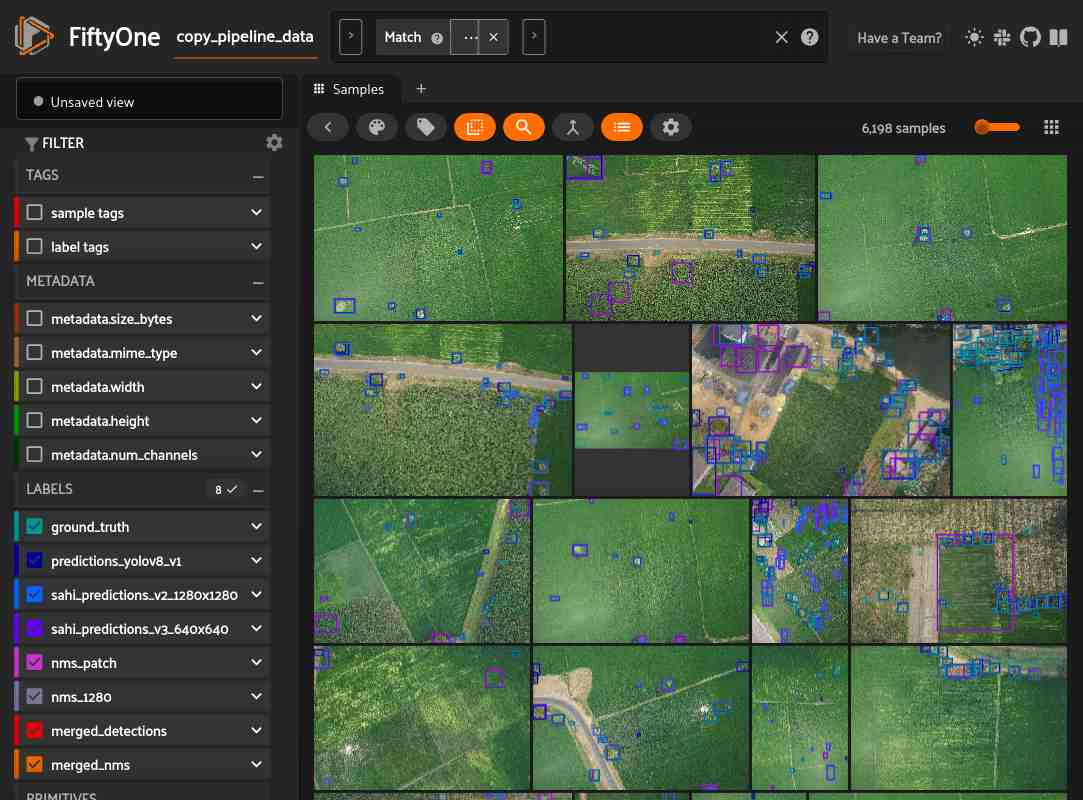

In [6]:
import os
import fiftyone as fo
import fiftyone.core.labels as fol

# Path to your images and annotations
image_dir = "datasets/practice_data/images/val"
annotation_dir = "datasets/practice_data/labels/val"

# Class names corresponding to the YOLO annotation labels
class_names = [
    "ELECTRIC_POLES",
    "TREES",
    "TEMPORARY_STRUCTURES",
    "PERMENANT_STRUCTURES",
    "SOLAR",
    "PYLON",
    "WELL",
    "TLP"
]

# Create a new dataset
dataset = fo.Dataset("abhilash_dataset")

# Load images and annotations into the dataset
for image_filename in os.listdir(image_dir):
    if image_filename.endswith((".JPG", ".jpeg", ".png")):
        image_path = os.path.join(image_dir, image_filename)
        annotation_path = os.path.join(annotation_dir, image_filename.replace(image_filename.split(".")[-1], "txt"))

        detections = []

        # Check if annotation file exists
        if os.path.exists(annotation_path):
            with open(annotation_path, "r") as f:
                for line in f:
                    parts = line.strip().split()
                    class_id = int(parts[0])
                    x_center = float(parts[1])
                    y_center = float(parts[2])
                    width = float(parts[3])
                    height = float(parts[4])

                    bounding_box = [
                        x_center - width / 2,
                        y_center - height / 2,
                        width,
                        height,
                    ]
                    label = class_names[class_id]
                    detections.append(
                        fol.Detection(
                            label=label,
                            bounding_box=bounding_box,
                        )
                    )

        # Add the sample to the dataset
        sample = fo.Sample(filepath=image_path)
        sample["ground_truth"] = fol.Detections(detections=detections)
        dataset.add_sample(sample)

# Launch the FiftyOne app
session = fo.launch_app(dataset)



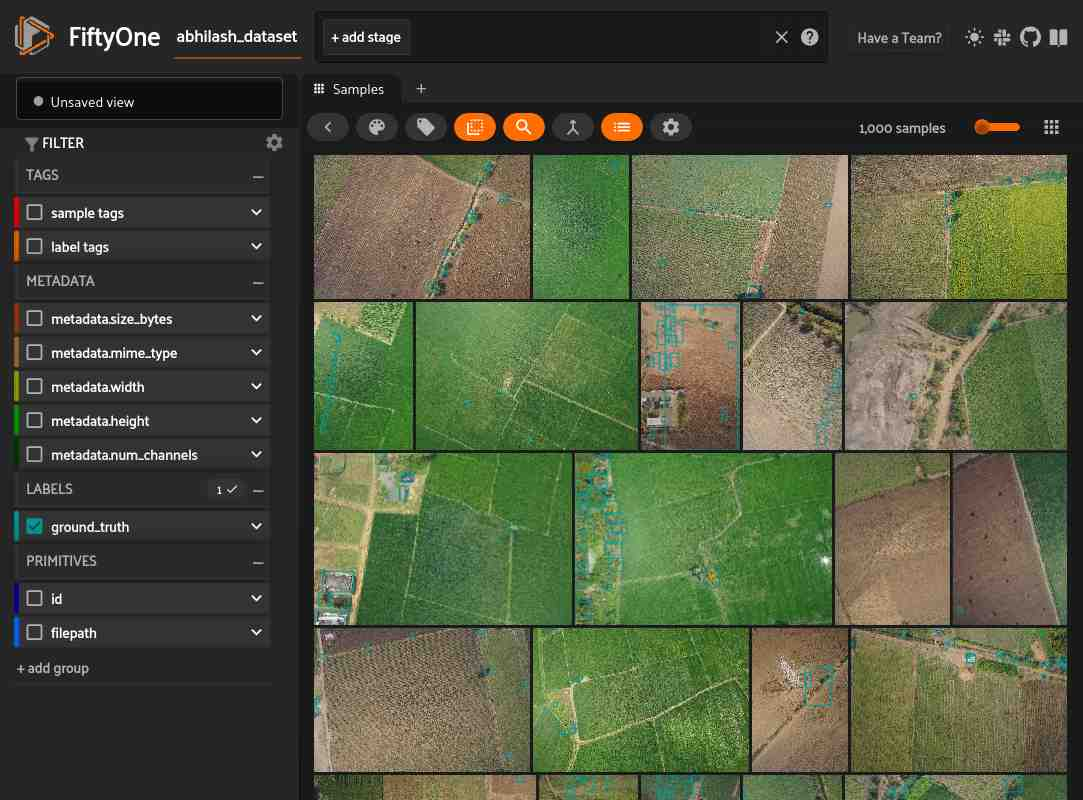

In [14]:
dataset = fo.load_dataset("abhilash_dataset")
session = fo.launch_app(dataset)


In [54]:
import cv2
# from fiftyone import fo
from fiftyone.core.metadata import ImageMetadata
import os

# Load your existing dataset
# dataset = fo.load_dataset("/path/to/your/dataset")

# Iterate over each sample in the dataset and update metadata
for sample in dataset:
    image_path = sample.filepath

    # Read image using OpenCV
    img = cv2.imread(image_path)
    height, width, _ = img.shape

    # Update metadata
    sample.metadata = ImageMetadata(width=width, height=height)
    print(sample.filepath)
    sample.save()
# Save the updated dataset
# cloned_dataset.save()


/home/naveen/workspace/voxel/Pipline_workspace/datasets/practice_data/images/val/DSC00155.JPG
/home/naveen/workspace/voxel/Pipline_workspace/datasets/practice_data/images/val/DSC01149.JPG
/home/naveen/workspace/voxel/Pipline_workspace/datasets/practice_data/images/val/DSC00231.JPG
/home/naveen/workspace/voxel/Pipline_workspace/datasets/practice_data/images/val/DSC00061-2.JPG
/home/naveen/workspace/voxel/Pipline_workspace/datasets/practice_data/images/val/DSC00025-3.JPG
/home/naveen/workspace/voxel/Pipline_workspace/datasets/practice_data/images/val/DSC00511.JPG
/home/naveen/workspace/voxel/Pipline_workspace/datasets/practice_data/images/val/DSC01212.JPG
/home/naveen/workspace/voxel/Pipline_workspace/datasets/practice_data/images/val/DSC00569.JPG
/home/naveen/workspace/voxel/Pipline_workspace/datasets/practice_data/images/val/DSC00580-2.JPG
/home/naveen/workspace/voxel/Pipline_workspace/datasets/practice_data/images/val/DSC00072.JPG
/home/naveen/workspace/voxel/Pipline_workspace/dataset

In [44]:
import os
import fiftyone as fo
import fiftyone.core.labels as fol
from PIL import Image

# Path to your images and annotations
image_dir = "datasets/practice_data/images/val"
annotation_dir = "datasets/practice_data/labels/val"

# Class names corresponding to the YOLO annotation labels
class_names = [
    "ELECTRIC_POLES",
    "TREES",
    "TEMPORARY_STRUCTURES",
    "PERMENANT_STRUCTURES",
    "SOLAR",
    "PYLON",
    "WELL",
    "TLP"
]

# Create a new dataset
dataset = fo.Dataset("abhilash_dataset")

# Load images and annotations into the dataset
for image_filename in os.listdir(image_dir):
    if image_filename.endswith((".JPG", ".jpeg", ".png")):
        image_path = os.path.join(image_dir, image_filename)
        annotation_path = os.path.join(annotation_dir, image_filename.replace(image_filename.split(".")[-1], "txt"))

        # Load the image to get its dimensions
        with Image.open(image_path) as img:
            img_width, img_height = img.size

        detections = []

        # Check if annotation file exists
        if os.path.exists(annotation_path):
            with open(annotation_path, "r") as f:
                for line in f:
                    parts = line.strip().split()
                    class_id = int(parts[0])
                    x_center = float(parts[1])
                    y_center = float(parts[2])
                    width = float(parts[3])
                    height = float(parts[4])

                    # Adjust bounding box according to image dimensions
                    if img_width > img_height:  # Landscape orientation
                        x_center *= img_width
                        y_center *= img_height
                        width *= img_width
                        height *= img_height
                        bounding_box = [
                            (x_center - width / 2) / img_width,
                            (y_center - height / 2) / img_height,
                            width / img_width,
                            height / img_height,
                        ]
                    else:  # Portrait orientation
                        x_center *= img_width
                        y_center *= img_height
                        width *= img_height
                        height *= img_width
                        bounding_box = [
                            (x_center - width / 2) / img_height,
                            (y_center - height / 2) / img_width,
                            width / img_width,
                            height / img_height,
                        ]

                    label = class_names[class_id]
                    detections.append(
                        fol.Detection(
                            label=label,
                            bounding_box=bounding_box,
                        )
                    )

        # Add the sample to the dataset
        sample = fo.Sample(filepath=image_path)
        sample["ground_truth"] = fol.Detections(detections=detections)
        dataset.add_sample(sample)

# Launch the FiftyOne app
session = fo.launch_app(dataset)

ValueError: Dataset name 'abhilash_dataset' is not available

In [49]:
import os
import fiftyone as fo
import fiftyone.core.labels as fol
from PIL import Image

# Path to your images and annotations
image_dir = "datasets/practice_data/images/val"
annotation_dir = "datasets/practice_data/labels/val"

# Class names corresponding to the YOLO annotation labels
class_names = [
    "ELECTRIC_POLES",
    "TREES",
    "TEMPORARY_STRUCTURES",
    "PERMENANT_STRUCTURES",
    "SOLAR",
    "PYLON",
    "WELL",
    "TLP"
]

# Create a new dataset
dataset = fo.Dataset("abhilash_dataset")

# Load images and annotations into the dataset
for image_filename in os.listdir(image_dir):
    if image_filename.endswith((".JPG", ".jpeg", ".png")):
        image_path = os.path.join(image_dir, image_filename)
        annotation_path = os.path.join(annotation_dir, image_filename.replace(image_filename.split(".")[-1], "txt"))

        # Load the image to get its dimensions
        with Image.open(image_path) as img:
            img_width, img_height = img.size

        detections = []

        # Check if annotation file exists
        if os.path.exists(annotation_path):
            with open(annotation_path, "r") as f:
                for line in f:
                    parts = line.strip().split()
                    class_id = int(parts[0])
                    x_center = float(parts[1])
                    y_center = float(parts[2])
                    width = float(parts[3])
                    height = float(parts[4])

                    # Adjust bounding box according to image dimensions
                    x1 = (x_center - width / 2)
                    y1 = (y_center - height / 2)
                    x2 = (x_center + width / 2)
                    y2 = (y_center + height / 2)

                    bounding_box = [
                        x1,
                        y1,
                        x2 - x1,
                        y2 - y1,
                    ]
                    label = class_names[class_id]
                    detections.append(
                        fol.Detection(
                            label=label,
                            bounding_box=bounding_box,
                        )
                    )

        # Add the sample to the dataset
        sample = fo.Sample(filepath=image_path)
        sample["ground_truth"] = fol.Detections(detections=detections)
        dataset.add_sample(sample)

# Launch the FiftyOne app
session = fo.launch_app(dataset)

ValueError: Dataset name 'abhilash_dataset' is not available


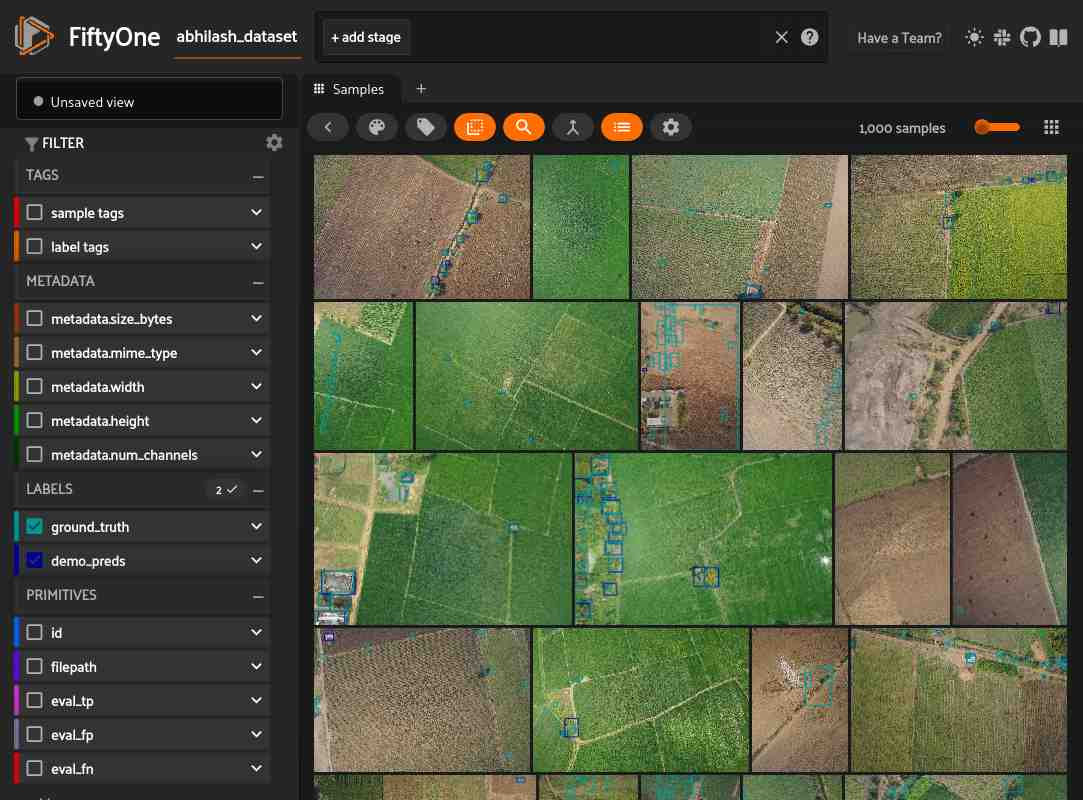

In [86]:
dataset = fo.load_dataset("abhilash_dataset")
session = fo.launch_app(dataset)

In [71]:
results = dataset.evaluate_detections(
    "demo_preds",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...
 100% |███████████████| 1000/1000 [30.4s elapsed, 0s remaining, 38.2 samples/s]      
Performing IoU sweep...
 100% |███████████████| 1000/1000 [17.9s elapsed, 0s remaining, 63.0 samples/s]      


In [73]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("ground_truth.detections.label")
classes_top8 = sorted(counts, key=counts.get, reverse=True)[:8]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top8)

                      precision    recall  f1-score   support

               TREES       0.73      0.25      0.38      8211
      ELECTRIC_POLES       0.68      0.08      0.14      3004
PERMENANT_STRUCTURES       0.40      0.06      0.10      1937
TEMPORARY_STRUCTURES       0.71      0.01      0.03       744
               PYLON       0.35      0.03      0.05       416
                WELL       0.58      0.06      0.11       377
               SOLAR       0.00      0.00      0.00        49
                 TLP       0.00      0.00      0.00         5

           micro avg       0.69      0.17      0.27     14743
           macro avg       0.43      0.06      0.10     14743
        weighted avg       0.65      0.17      0.26     14743



In [74]:
print(results.mAP())

0.035939067310691575



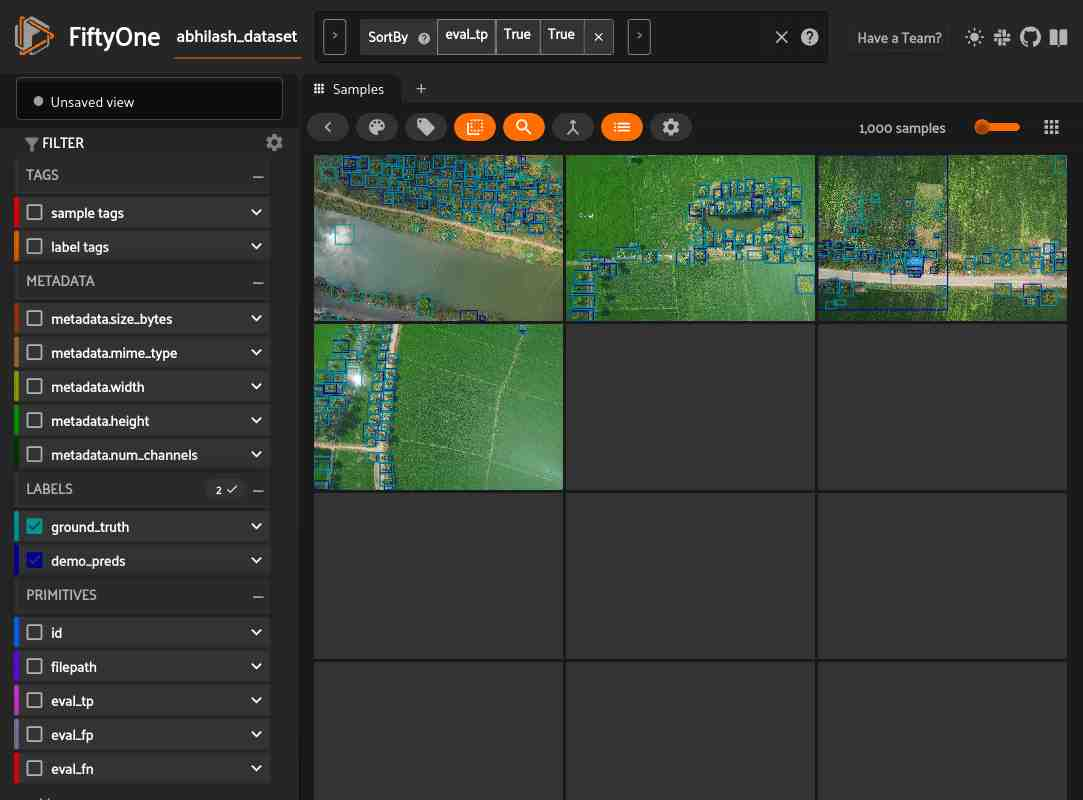

In [76]:
# Show samples with most true positives
session.view = dataset.sort_by("eval_tp", reverse=True)


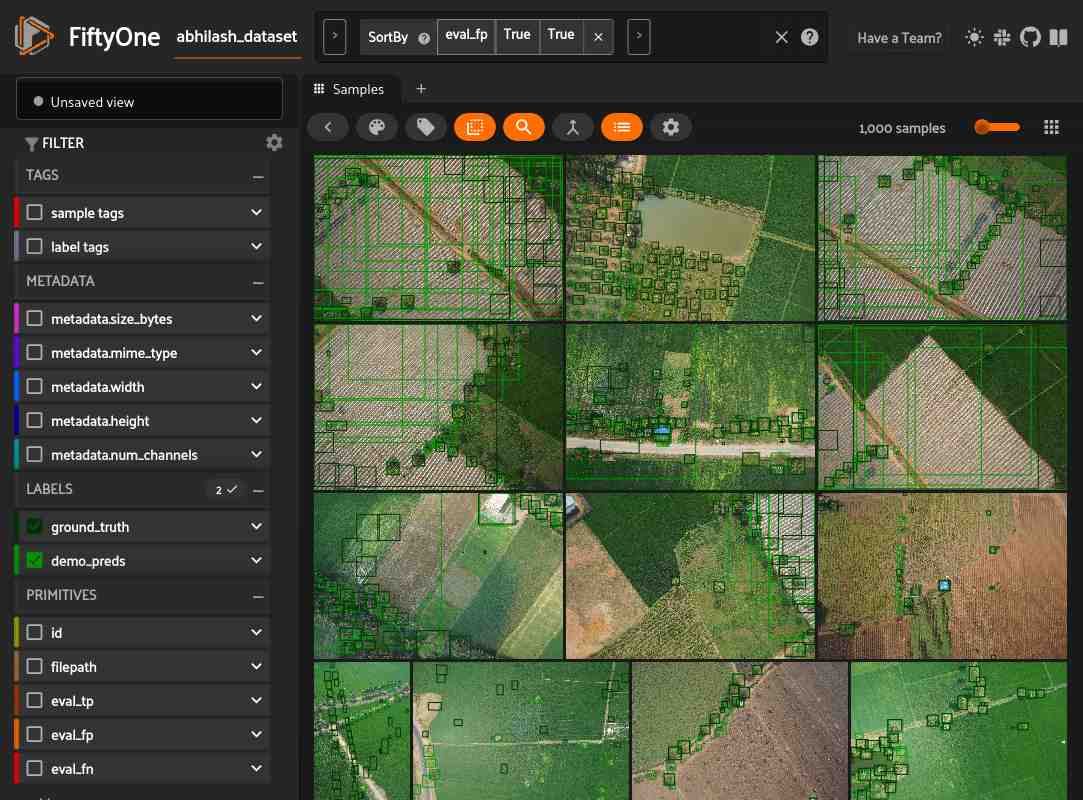

In [77]:
# Show samples with most false positives
session.view = dataset.sort_by("eval_fp", reverse=True)

In [63]:
view.load_annotations("ann101", cleanup=True)

Download complete
Loading labels for field 'cvat_data'...
 100% |███████████████████| 10/10 [65.9ms elapsed, 0s remaining, 151.7 samples/s] 
Deleting tasks...
 100% |█████████████████████| 1/1 [672.4ms elapsed, 0s remaining, 1.5 samples/s] 


In [62]:
anno_key = "ann101"

# Upload the samples and launch CVAT
anno_results = view.annotate(
    anno_key,
    label_field="cvat_data",
    label_type="detections",
    classes=["ELECTRIC_POLES", "TREES", "TEMPORARY_STRUCTURES", "PERMENANT_STRUCTURES","SOLAR", "PYLON", "WELL", "TLP"],
    launch_editor=True,
)

Please enter your login credentials.
You can avoid this in the future by setting your `FIFTYONE_CVAT_USERNAME` and `FIFTYONE_CVAT_PASSWORD` environment variables


Username:  mekala.reddy
Password:  ········


Uploading samples to CVAT...
Launching editor at 'https://app.cvat.ai/tasks/795282/jobs/1021990'...


In [ ]:
results = dataset.evaluate_detections(
    "sahi_predictions_v2_1280x1280",
    gt_field="ground_truth",
    eval_key="c_1",
    compute_mAP=True,
    classwise=False
)

In [ ]:
counts = dataset.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:9]

results.print_report(classes=classes)

In [ ]:

# Iterate over each sample in the dataset
for sample in dataset:
    # print(sample)
    for i in range(0,len(sample.ground_truth.detections)):
        
        if 'c_1_iou' not in sample.ground_truth.detections[i]:
            
            # print("yes")
            sample.ground_truth.detections[i].tags.append('gt_not_matching_1280x1280')
            sample.save()
print("done")


In [ ]:
# import typer
# from groundingdino.util.inference import load_model, load_image, predict
# from tqdm import tqdm
# import torchvision
# import torch
# import fiftyone as fo


# def main(
#         image_directory: str = 'test_grounding_dino',
#         text_prompt: str = "ELECTRIC_POLES", "TREES", "TEMPORARY_STRUCTURES", "PERMENANT_STRUCTURES","SOLAR", "PYLON", "WELL", "TLP",
#         box_threshold: float = 0.15, 
#         text_threshold: float = 0.10,
#         export_dataset: bool = False,
#         view_dataset: bool = False,
#         export_annotated_images: bool = True,
#         weights_path : str = "groundingdino_swint_ogc.pth",
#         config_path: str = "../../GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py",
#         subsample: int = None,
#     ):

#     model = load_model(config_path, weights_path)
    
#     dataset = fo.Dataset.from_images_dir(image_directory)

#     samples = []

#     if subsample is not None: 
        
#         if subsample < len(dataset):
#             dataset = dataset.take(subsample).clone()
    
#     for sample in tqdm(dataset):

#         image_source, image = load_image(sample.filepath)

#         boxes, logits, phrases = predict(
#             model=model, 
#             image=image, 
#             caption=text_prompt, 
#             box_threshold=box_threshold, 
#             text_threshold=text_threshold,
#         )

#         detections = [] 

#         for box, logit, phrase in zip(boxes, logits, phrases):

#             rel_box = torchvision.ops.box_convert(box, 'cxcywh', 'xywh')

#             detections.append(
#                 fo.Detection(
#                     label=phrase, 
#                     bounding_box=rel_box,
#                     confidence=logit,
#             ))

#         # Store detections in a field name of your choice
#         sample["dino_detections"] = fo.Detections(detections=detections)
#         sample.save()

#     # loads the voxel fiftyone UI ready for viewing the dataset.
#     if view_dataset:
#         session = fo.launch_app(dataset)
#         session.wait()
        
#     # exports COCO dataset ready for training
#     if export_dataset:
#         dataset.export(
#             'coco_dataset',
#             dataset_type=fo.types.COCODetectionDataset,
#         )
        
#     # saves bounding boxes plotted on the input images to disk
#     if export_annotated_images:
#         dataset.draw_labels(
#             'images_with_bounding_boxes',
#             label_fields=['detections']
#         )


# if __name__ == '__main__':
#     typer.run(main)